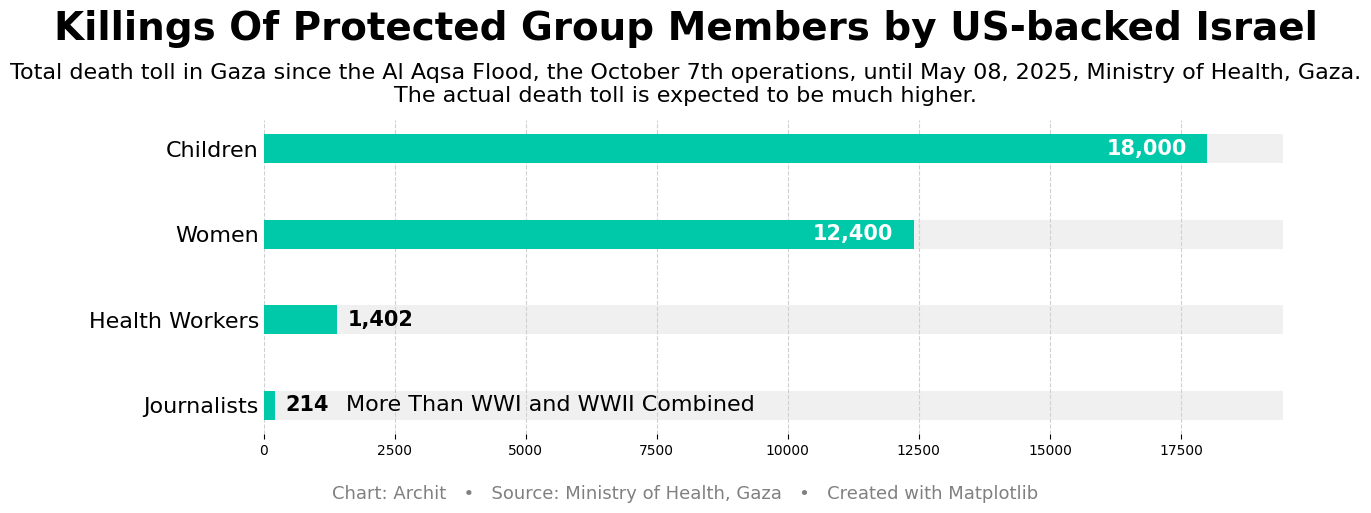

In [47]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# Download and save CSV
url = 'https://data.techforpalestine.org/api/v2/casualties_daily.csv'
response = requests.get(url)
df = pd.read_csv(StringIO(response.text))
df.to_csv('gaza_daily.csv', index=False)

# Extract latest data (replace with your actual values if needed)
latest = df.iloc[-1]
report_date = pd.to_datetime(latest['report_date']).strftime('%B %d, %Y')
death_toll = f"{int(latest['killed_cum']):,}"

labels = ['Journalists', 'Health Workers', 'Women', 'Children']
values = [
    int(latest['ext_press_killed_cum']),
    int(latest['ext_med_killed_cum']),
    int(latest['ext_killed_women_cum']),
    int(latest['ext_killed_children_cum'])
]

# Chart settings
width_px, height_px = 1224, 526
dpi = 100
fig_width, fig_height = width_px / dpi, height_px / dpi

fig, ax = plt.subplots(figsize=(fig_width, fig_height), dpi=dpi)

# Bar settings
bar_color = '#00C9AA'
bg_color = '#f0f0f0'
bar_height = 0.34  # Thinner bars
y_pos = range(len(labels))
max_val = max(values) * 1.08  # Fill chart area

# Background bars
ax.barh(y_pos, [max_val]*len(labels), color=bg_color, height=bar_height, zorder=0)

# Data bars
bars = ax.barh(y_pos, values, color=bar_color, height=bar_height, zorder=2)

# Grid and axes
ax.xaxis.grid(True, linestyle='--', color='#d0d0d0', zorder=1)
ax.set_axisbelow(True)
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)
ax.tick_params(axis='y', length=0)
ax.set_xlim(0, max_val)
ax.set_yticks(y_pos)
ax.set_yticklabels(labels, fontsize=16)

# Value labels (outside for Journalists and Health Workers)
for i, bar in enumerate(bars):
    width = bar.get_width()
    y = bar.get_y() + bar.get_height()/2
    if labels[i] in ['Journalists', 'Health Workers']:
        ax.text(width + max_val*0.01, y, f'{width:,}',
                va='center', ha='left', color='black', fontsize=15, fontweight='bold')
    else:
        ax.text(width - max_val*0.02, y, f'{width:,}',
                va='center', ha='right', color='white', fontsize=15, fontweight='bold')

# Journalist annotation (no arrow, just text to the right)
journalist_idx = 0
journalist_bar = bars[journalist_idx]
j_width = journalist_bar.get_width()
j_y = journalist_bar.get_y() + journalist_bar.get_height()/2
# Place annotation text well to the right of the number
ax.text(j_width + max_val*0.07, j_y, 'More Than WWI and WWII Combined',
        va='center', ha='left', fontsize=16, color='black', fontweight='normal')

# Titles with subtitle close to title (not above chart)
fig.subplots_adjust(top=1.00)
fig.suptitle(
    'Killings Of Protected Group Members by US-backed Israel',
    fontsize=28, fontweight='bold', y=0.96
)
fig.text(
    0.5, 0.86,
    'Total death toll in Gaza since the Al Aqsa Flood, the October 7th operations, until '
    f'{report_date}, Ministry of Health, Gaza.\nThe actual death toll is expected to be much higher.',
    ha='center', va='top', fontsize=16, color='black'
)

# Footer
plt.figtext(
    0.5, 0.03,
    'Chart: Archit   •   Source: Ministry of Health, Gaza   •   Created with Matplotlib',
    ha='center', fontsize=13, color='gray'
)

plt.tight_layout(rect=[0, 0.08, 1, 0.88])
plt.savefig('gaza_death_toll_chart.png', dpi=dpi, bbox_inches='tight')
plt.show()
